In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from os.path import join, split

In [61]:
def statistics(df01, path2, out_sta_fi, col_name):
    """
    Graba en un fichero los estadísticos de una columna de una hoja Excel
    path2: 
    df01: pandas dataframe
        Instanciado fuera de la función
    path2: txt
        Nombre del directorio donde se grabarán los resultados
    out_sta_fi: txt
        Nombre del fichero txt de resultados por ej, 'c:\documents\pnp.txt'
    column01: txt
        Nombre de la columna en la hoja Excel que coincide con el nombre en el dataframe
    Return: None
    """
    with open(join(path2, out_sta_fi), 'w') as fo:
        fo.write(f"medidas\t{df01[col_name].count():f}\n")
        fo.write(f"media\t{df01[col_name].mean():f}\n")
        fo.write(f"mediana\t{df01[col_name].median():f}\n")
        fo.write(f"percentil 10\t{df01[col_name].quantile(0.1):f}\n")
        fo.write(f"percentil 25\t{df01[col_name].quantile(0.25):f}\n")
        fo.write(f"percentil 75\t{df01[col_name].quantile(0.75):f}\n")
        fo.write(f"percentil 90\t{df01[col_name].quantile(0.9):f}\n")
        fo.write(f"skew\t{df01[col_name].skew():f}\n")
        print('concluido')


In [ ]:
def histogram(path2, fi_name, df01, col_name, title, xlabel, ylabel):
    name_file = 'pnp_avg_2021.png'
    fig = plt.hist(df01[column01], density=False, bins=30)  # `density=False` would make counts
    plt.ylabel('Número de sondeos')
    plt.xlabel('Profundidad agua subterránea (m)')
    plt.title("Profundidad media del agua subterránea (2021)")
    plt.savefig(join(head,name_file))
    

### Piezometría CHS 2021
Los leo del fichero Excel

In [52]:
fi01=r'H:\LSGB\20220324_informe_pz\memoria\data_analisis.xlsx'
head, tail = split(fi01)

df = pd.read_excel(fi01, None);
print('sheets')
for key in df.keys():
    print(key)


sheets
Prof_media_2021_m
PNP_2021_2020


## Profundidad media del agua subterránea en 2021

In [9]:
sheet01 = 'Prof_media_2021_m'
df01 = pd.read_excel(fi01, sheet_name=sheet01)

In [10]:
df01.dtypes

masub        float64
nombre        object
id            object
pnp          float64
sdev         float64
n_medidas      int64
red           object
dtype: object

In [11]:
out_sta_fi = 'pnp_statistics.txt'
column01 = 'pnp'
with open(join(head,out_sta_fi), 'w') as fo:
    fo.write(f"medidas\t{df01[column01].count():f}\n")
    fo.write(f"media\t{df01[column01].mean():f}\n")
    fo.write(f"mediana\t{df01[column01].median():f}\n")
    fo.write(f"percentil 10\t{df01[column01].quantile(0.1):f}\n")
    fo.write(f"percentil 25\t{df01[column01].quantile(0.25):f}\n")
    fo.write(f"percentil 75\t{df01[column01].quantile(0.75):f}\n")
    fo.write(f"percentil 90\t{df01[column01].quantile(0.9):f}\n")
    fo.write(f"skew\t{df01[column01].skew():f}\n")


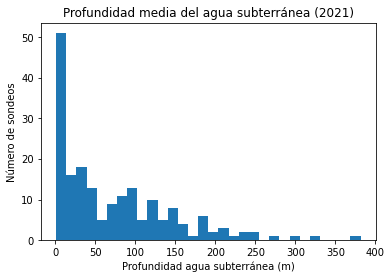

In [13]:
name_file = 'pnp_avg_2021.png'
fig = plt.hist(df01[column01], density=False, bins=30)  # `density=False` would make counts
plt.ylabel('Número de sondeos')
plt.xlabel('Profundidad agua subterránea (m)')
plt.title("Profundidad media del agua subterránea (2021)")
plt.savefig(join(head,name_file))

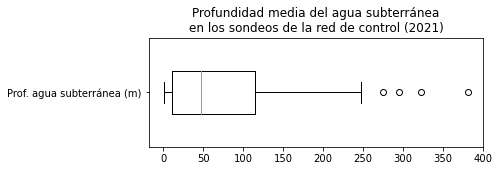

In [39]:
name_file = 'pnp_boxplot.png'
fig1, ax1 = plt.subplots(figsize=(6, 2)) 
ax1.set_title('Profundidad media del agua subterránea\nen los sondeos de la red de control (2021)')
ax1.boxplot(df01[column01], widths=0.4, labels=['Prof. agua subterránea (m)'], vert=False)
plt.savefig(join(head,name_file))

## Variación media de la prof. del agua sub. entre 2020 y 2021

In [59]:
sheet02 = 'PNP_2021_2020'
df02 = pd.read_excel(fi01, sheet_name=sheet02)
df02.dtypes

masub                float64
nombre                object
sondeo                object
pnp_var_2021_2020    float64
geom                  object
dtype: object

In [62]:
out_sta_fi2 = 'pnp_avg_2021.png'
col_name2 = 'pnp_var_2021_2020'

statistics(df02, head, out_sta_fi, col_name2)

concluido


In [ ]:
name_file = 'pnp_var_2020_21.png'
cdf = df02
title = 'Variación de la prof. del agua subterránea (2021-2020)'
xlabel = 'Variación (m)'
ylabel = 'Número de sondeos'
    
histogram(head, name_file, cdf, col_name2, title, xlabel, ylabel)